In [3]:
## Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


## Importing the dataset

file = open('log_190405_120032_KSWO.csv')


# reading the information of the A/C:
csvreader = csv.reader(file)
header = []
header = next(csvreader)


###############################################################

#X = dataset.iloc[1:,:].values
#y = dataset.iloc[:, -1].values
# reading the rest:
rows = []


for row in csvreader:
  rows.append(row)

file.close()
#rows
#rows[1]
# rows[0] is useless! ONLY UNITS!

#print(header)

#i=0
#j=0
#for martix in rows:
 # print(matrix[1])
 # i=i+1
 # j=j+1
#rows[1]

# Import the NumPy library
#import numpy as np
# Create the list of lists
#rows = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]
# Calculate length of maximal list
n = len(max(rows, key=len))
# Make the lists equal in length
rows_2 = [x + [None]*(n-len(x)) for x in rows]
#print(rows_2)
# [[1, 2, 3, None], [4, 5, None, None], [6, 7, 8, 9]]
# Convert it to a NumPy array
matrix = np.array(rows_2[1:])
# Print the resulting array
#print(matrix)
#print(a[3,-4]#)


#print(matrix[1])

#rows = np.array(rows)
shape = (len(matrix),len(matrix[0]))

#print(matrix.reshape(shape))


#martix=[]
##for i in range(1,len(rows)):
 # for j in range(0,len(rows[0])):
  #  matrix(i-1,j)=rows[i][j]
  

In [4]:
df = pd.read_csv('log_190405_120032_KSWO.csv',header=2)
df = df.apply(pd.to_numeric, errors='coerce')
#df.head(10)
#df.columns


#df.info()



#df.describe()
#%matplotlib inline
#import matplotlib.pylab as plt
#plt.figure(figsize=(15,8)) 
#plt.plot(df['     Latitude'],df['    Longitude'])
#plt.show()
#import matplotlib.pylab as plt
#plt.figure(figsize=(15,8)) 
#plt.plot(df['     Latitude'],df['    Longitude'])


In [5]:
#df.columns

In [6]:
#df['     Latitude'][3]

In [7]:
import requests
import urllib
import pandas as pd

# USGS Elevation Point Query Service
url = r'https://nationalmap.gov/epqs/pqs.php?'

# coordinates with known elevation 

steps=50
# create data frame
dff = pd.DataFrame({
    'lat':df['     Latitude'][0:len(df['     Latitude']):steps],
    'lon':df['    Longitude'][0:len(df['     Latitude']):steps]
})

def elevation_function(dff, lat_column, lon_column):
    """Query service using lat, lon. add the elevation values as a new column."""
    elevations = []
    for lat, lon in zip(dff[lat_column], dff[lon_column]):

        # define rest query params
        params = {
            'output': 'json',
            'x': lon,
            'y': lat,
            'units': 'Feet'
        }

        # format query string and return query value
        result = requests.get((url + urllib.parse.urlencode(params)))
        elevations.append(result.json()['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation'])

    dff['elev_feet'] = elevations

elevation_function(dff, 'lat', 'lon')
#dff.head()

In [8]:
#print(dff)


In [9]:
#print(dff['elev_feet'])


In [10]:
#[0:2000:100]
for x in range (0,len(df['  AltMSL']),steps):
    df['ATA']=(df['  AltMSL'])-(dff['elev_feet'])
    
    
    !
#print(df['  AltMSL'][0])


!
#print(df['ATA'])

In [11]:
df['ATA'] = df['ATA'].fillna(0)
#print(df['ATA'])

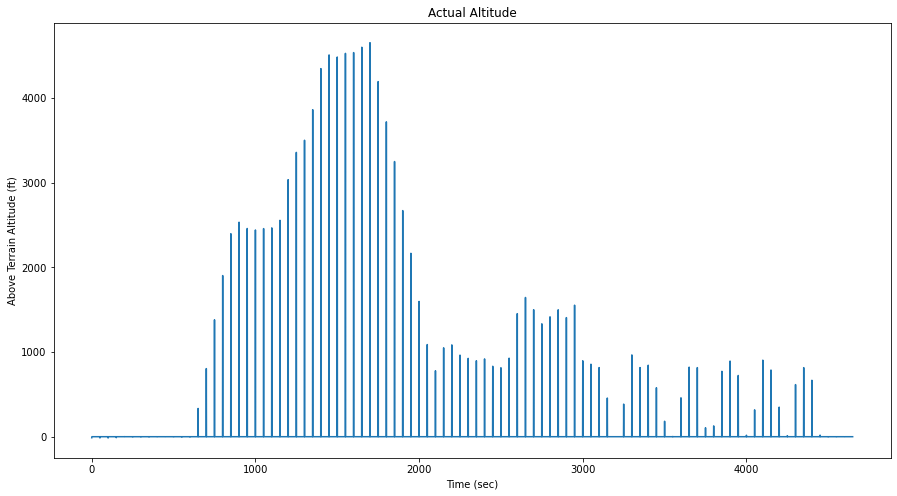

In [12]:
time=range(len(['ATA']))
import matplotlib.pylab as plt
plt.figure(figsize=(15,8)) 
plt.plot(df['ATA'])
plt.xlabel('Time (sec)')
plt.ylabel('Above Terrain Altitude (ft)')
plt.title('Actual Altitude') 
plt.savefig('Actual Altitude_1.jpg')

In [13]:
#for x in df['ATA']:
#if df['ATA']>0:
       #3 print("Hi")
        #and (df['ATA'][x]<1000):
        #print(x,df['ATA'][x])
Litem = []
Lindex= []
for idx, itm in enumerate (df['ATA']):
    if (itm!=0) and (itm<1000): #zero is excluded due to discrete data extraction (otherwise equal to zero)!
        #print(idx, itm)
        Litem.append(itm)
        Lindex.append(idx)

In [14]:
#df['ATA'][150]

In [15]:
len(Litem)

56

In [16]:
print(Lindex)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 2100, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600]


In [17]:
for ii in range (0,len(Lindex)):
    print(Lindex[ii],Litem[ii])

0 -12.240000000000009
50 -14.840000000000032
100 -15.680000000000064
150 -11.539999999999964
200 1.4300000000000637
250 -3.659999999999968
300 -3.759999999999991
350 -3.82000000000005
400 -2.0699999999999363
450 -1.5799999999999272
500 -2.75
550 -5.149999999999977
600 -4.349999999999909
650 333.5400000000001
700 804.3
2100 778.4999999999999
2250 963.29
2300 924.8399999999999
2350 896.55
2400 918.35
2450 831.7299999999999
2500 813.7900000000001
2550 927.1800000000001
3000 896.1999999999999
3050 855.7900000000001
3100 816.25
3150 456.47
3200 -0.7300000000000182
3250 384.81000000000006
3300 965.4899999999999
3350 816.26
3400 843.9099999999999
3450 577.9
3500 182.54999999999995
3550 2.669999999999959
3600 458.83000000000004
3650 821.3499999999999
3700 815.76
3750 105.59000000000003
3800 127.40000000000009
3850 772.08
3900 893.1399999999999
3950 723.04
4000 17.399999999999977
4050 316.93000000000006
4100 903.77
4150 787.4899999999999
4200 349.07000000000005
4250 12.420000000000073
4300 615.

In [18]:
Lcheck=[Lindex[i+1]-Lindex[i] for i in range(len(Lindex)-1)]
print(Lcheck)
for i in Lcheck:
    if i!=steps:
        print("Wait! You need to know more about it! NOT always downward")
    else:
        print("Heading the Ground!")

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1400, 150, 50, 50, 50, 50, 50, 50, 450, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Wait! You need to know more about it! NOT always downward
Wait! You need to know more about it! NOT always downward
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Wait! You need to know more about it! NOT always downward
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
Heading the Ground!
H

In [19]:
Lcheck2=[Lindex[i+3]-Lindex[i] for i in range(len(Lindex)-3)]
print(Lcheck)
j=-1
for i in Lcheck2:
    j=j+1
    #072822 NOW
    #if Litem[j]>0:
    if i!=3*steps:
       
        print(Lindex[j],Litem[j],"Wait! Maybe a Maneuver!")
        
    else:
        print(Lindex[j],Litem[j],"Near the Terrain!")

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1400, 150, 50, 50, 50, 50, 50, 50, 450, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
0 -12.240000000000009 Near the Terrain!
50 -14.840000000000032 Near the Terrain!
100 -15.680000000000064 Near the Terrain!
150 -11.539999999999964 Near the Terrain!
200 1.4300000000000637 Near the Terrain!
250 -3.659999999999968 Near the Terrain!
300 -3.759999999999991 Near the Terrain!
350 -3.82000000000005 Near the Terrain!
400 -2.0699999999999363 Near the Terrain!
450 -1.5799999999999272 Near the Terrain!
500 -2.75 Near the Terrain!
550 -5.149999999999977 Near the Terrain!
600 -4.349999999999909 Wait! Maybe a Maneuver!
650 333.5400000000001 Wait! Maybe a Maneuver!
700 804.3 Wait! Maybe a Maneuver!
2100 778.4999999999999 Wait! Maybe a Maneuver!
2250 963.29 Near the Terrain!
2300 924.8399999999999 Near the Terrain!
2350 896.55 Near the Terrain!
2400 918.35 Near th

In [20]:
Lcheck2=[Lindex[i+3]-Lindex[i] for i in range(len(Lindex)-3)]
print(Lcheck)
j=-1
Phase=[]
for i in Lcheck2:
    j=j+1
    #072822 NOW
    if Litem[j]>0:
        if (i!=3*steps) and (Litem[j+1]<Litem[j]):
            print(Lindex[j],Litem[j],"Temporary! Maybe a Maneuver!")
            Phase.append('MN')
        
        else:
            if (Litem[j+3]>Litem[j]):
                print (Lindex[j],Litem[j],"It is a TakeOff phase!")
                Phase.append('NT')
            elif (Litem[j+1]<Litem[j]) and (Litem[j+1]>0):
                print(Lindex[j],Litem[j],"It really seems to be a Landing!")
                Phase.append('LD')
       

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 1400, 150, 50, 50, 50, 50, 50, 50, 450, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
650 333.5400000000001 It is a TakeOff phase!
700 804.3 Temporary! Maybe a Maneuver!
2100 778.4999999999999 It is a TakeOff phase!
2250 963.29 It really seems to be a Landing!
2300 924.8399999999999 It really seems to be a Landing!
2400 918.35 It is a TakeOff phase!
2450 831.7299999999999 Temporary! Maybe a Maneuver!
2500 813.7900000000001 It is a TakeOff phase!
2550 927.1800000000001 Temporary! Maybe a Maneuver!
3000 896.1999999999999 It really seems to be a Landing!
3050 855.7900000000001 It really seems to be a Landing!
3100 816.25 It really seems to be a Landing!
3150 456.47 It is a TakeOff phase!
3250 384.81000000000006 It is a TakeOff phase!
3300 965.4899999999999 It really seems to be a Landing!
3400 843.9099999999999 It really seems to be a Landing!
3450 577

In [21]:
print(Phase)

['NT', 'MN', 'NT', 'LD', 'LD', 'NT', 'MN', 'NT', 'MN', 'LD', 'LD', 'LD', 'NT', 'NT', 'LD', 'LD', 'LD', 'NT', 'NT', 'LD', 'LD', 'NT', 'NT', 'LD', 'NT', 'NT', 'NT', 'LD', 'LD', 'NT', 'NT', 'LD', 'LD']


In [22]:
#*****Hand Coding to compare with Logistic Regresison****#


In [23]:
def Tan(x):
    import math
    return (math.tan(x*math.pi/180))
#Tan(45)
print(Tan(2.5),Tan(3.5), Tan(90))

0.04366094290851206 0.061162620150484306 1.633123935319537e+16


In [24]:
def Atan(x):
    import math
    return (math.degrees(math.atan(x)))

Atan(1)



45.0

In [25]:
def ConvertFPM(x):
    import math
    return (x/101.269)

ConvertFPM(900)


8.887221163435997

In [26]:
## Rating the Approach Phase:
#print(len(df['  AltMSL']))
interval=30
Lintdd_VSpd=[]
#Diff_VSpd=[]
#Intdd_VSpd=[]
first=2230
for i in range (first, len(df['  AltMSL'])+1, interval):
    print('GroundSpeed:',df[' GndSpd'][i])#,df['  AltMSL'][i])
          
    if 110<(df[' GndSpd'][i])<=130:
        upper=130
        lower=110
        vs_up=690
        vs_low=585
        Intdd_VSpd=(-((((df[' GndSpd'][i])-lower)*(vs_up-vs_low)/(upper-lower))+vs_low))
        #Diff_VSpd.append(abs(Intdd_VSpd[i]-df['    VSpd'][i]))
        print('Intended VSpd:',Intdd_VSpd,'Real VSpd:', df['    VSpd'][i])
    elif 90<(df[' GndSpd'][i])<=110:  
        upper=110
        lower=90
        vs_up=585
        vs_low=475
        Intdd_VSpd=(-((((df[' GndSpd'][i])-lower)*(vs_up-vs_low)/(upper-lower))+vs_low))
        print('VSpd:',Intdd_VSpd,'Real VSpd:', df['    VSpd'][i])
    elif (df[' GndSpd'][i])<=90:
        upper=110
        lower=90
        vs_up=585
        vs_low=475
        Intdd_VSpd=(-((((df[' GndSpd'][i])-lower)*(vs_up-vs_low)/(upper-lower))+vs_low))#*(-1)
        #if (Intdd_VSpd>0):
        print('VSpd:',Intdd_VSpd,'Real VSpd:', df['    VSpd'][i])
        #else:
          #  print('The Landing Phase Finished!')
    Lintdd_VSpd.append(Intdd_VSpd)     
    #Real_VSpd[i]=df['    VSpd'][i]          
    #Diff_VSpd.append(abs(df['Intdd_VSpd'][i]-df['    VSpd'][i]))
    #print('The Difference in VSpd is:',Diff_VSpd)
        

GroundSpeed: 101.57
VSpd: -538.635 Real VSpd: 289.54
GroundSpeed: 105.43
VSpd: -559.865 Real VSpd: -260.01
GroundSpeed: 98.65
VSpd: -522.575 Real VSpd: 62.03
GroundSpeed: 102.56
VSpd: -544.08 Real VSpd: -174.46
GroundSpeed: 108.74
VSpd: -578.0699999999999 Real VSpd: -518.47
GroundSpeed: 104.68
VSpd: -555.74 Real VSpd: 197.91
GroundSpeed: 98.3
VSpd: -520.65 Real VSpd: 105.45
GroundSpeed: 101.9
VSpd: -540.45 Real VSpd: -0.95
GroundSpeed: 99.58
VSpd: -527.6899999999999 Real VSpd: -215.61
GroundSpeed: 96.41
VSpd: -510.255 Real VSpd: 180.91
GroundSpeed: 105.14
VSpd: -558.27 Real VSpd: -292.71
GroundSpeed: 91.5
VSpd: -483.25 Real VSpd: 860.29
GroundSpeed: 93.89
VSpd: -496.395 Real VSpd: 666.86
GroundSpeed: 97.99
VSpd: -518.9449999999999 Real VSpd: 70.44
GroundSpeed: 107.44
VSpd: -570.92 Real VSpd: -93.0
GroundSpeed: 112.24
Intended VSpd: -596.76 Real VSpd: -16.44
GroundSpeed: 110.33
Intended VSpd: -586.7325 Real VSpd: -278.54
GroundSpeed: 104.03
VSpd: -552.165 Real VSpd: -54.92
GroundSpeed: 

In [27]:
#print(Lintdd_VSpd)

In [28]:
#carname="Swift"
#caryear="2000"
#carcolor="white"
#file = open("car.txt", "w")
#carname = repr(carname)
#caryear = repr(caryear)
#carcolor = repr(carcolor)
#file.write("Car Name = " + carname + "\n" +"Car Year = "+caryear + "\n"+"Car color = "+carcolor )
#file.close

In [29]:

print(ConvertFPM(df['    VSpd'][0])) 

-0.07820754623823677


In [30]:
Ldiff_VSpd=[]
Ltan_VSpd=[]
Latan_VSpd=[]





#f=open("Safety_Performance_1.txt","a")
for i in range (0, len(Lintdd_VSpd)):

    Diff_VSpd=(abs(Lintdd_VSpd[i]-df['    VSpd'][first+interval*(i)]))/abs(Lintdd_VSpd[i])
    tan_VSpd=abs(ConvertFPM(df['    VSpd'][first+interval*(i)])/df[' GndSpd'][first+interval*(i)])
    #Velang=
    #print(ConvertFPM(df['    VSpd'][first+interval*(i)]))             
    Arktan=Atan((ConvertFPM(df['    VSpd'][first+interval*(i)]))/(df[' GndSpd'][first+interval*(i)]))
    #print(i,Lintdd_VSpd[i],df['    VSpd'][first+interval*(i)],df['  Pitch'][first+interval*(i)])
    Ldiff_VSpd.append(Diff_VSpd)
    Ltan_VSpd.append(tan_VSpd)
    Latan_VSpd.append(Arktan)
    if (tan_VSpd<Tan(2.5) or tan_VSpd>Tan(3.5)) and df['  Pitch'][first+interval*(i)]<-2.5:
        print()
        print("---Absolute Danger!---")
        print(first+interval*(i),Ltan_VSpd[i],df['  Pitch'][first+interval*(i)],df['    VSpd'][first+interval*(i)],(Lintdd_VSpd[i]))
        
       #                             
        
        #,first+interval*(i),Ldiff_VSpd[i],df['  Pitch'][first+interval*(i)])
    
        #File.append(("---Absolute Danger!---"))
        #BB=File.append()
    elif tan_VSpd<Tan(2.5) or Diff_VSpd>Tan(3.5):
        print()
        print('Safety Issue: Diff_VSpd!')
        print(first+interval*(i),Ltan_VSpd[i],df['    VSpd'][first+interval*(i)],(Lintdd_VSpd[i]))#print(i,Lintdd_VSpd[i],df['    VSpd'][first+interval*(i)],df['  Pitch'][first+interval*(i)])
        
    elif df['  Pitch'][first+interval*(i)]<-2.5:
        print()
        print('Safety Issue: Pitch Angle!')
        #print(i,Lintdd_VSpd[i],df['    VSpd'][first+interval*(i)],df['  Pitch'][first+interval*(i)])
        print(first+interval*(i),df['  Pitch'][first+interval*(i)])
    #f.write("---Absolute Danger!---\n"+first+interval*(i),Ldiff_VSpd[i],df['  Pitch'][first+interval*(i)]+"\n")
#f.close() 
  
    #print(Diff_VSpd)


Safety Issue: Diff_VSpd!
2230 0.028149234962874633 289.54 -538.635

Safety Issue: Diff_VSpd!
2260 0.024352823618672668 -260.01 -559.865

Safety Issue: Diff_VSpd!
2290 0.006209093076172043 62.03 -522.575

Safety Issue: Diff_VSpd!
2320 0.016797371773412246 -174.46 -544.08

Safety Issue: Diff_VSpd!
2350 0.04708231210641756 -518.47 -578.0699999999999

Safety Issue: Diff_VSpd!
2380 0.01866927716698104 197.91 -555.74

Safety Issue: Diff_VSpd!
2410 0.010592940789921169 105.45 -520.65

Safety Issue: Diff_VSpd!
2440 9.20604089550125e-05 -0.95 -540.45

Safety Issue: Diff_VSpd!
2470 0.021380618096543656 -215.61 -527.6899999999999

Safety Issue: Diff_VSpd!
2500 0.018529511469271356 180.91 -510.255

Safety Issue: Diff_VSpd!
2530 0.027491160006228206 -292.71 -558.27

Safety Issue: Diff_VSpd!
2560 0.0928425925281403 860.29 -483.25

Safety Issue: Diff_VSpd!
2590 0.07013564697517105 666.86 -496.395

Safety Issue: Diff_VSpd!
2620 0.0070984098009142845 70.44 -518.9449999999999

Safety Issue: Diff_VSpd!


In [31]:
#print(Ldiff_VSpd)

In [32]:
#import matplotlib.pylab as plt
#plt.figure(figsize=(15,8)) 
#plt.plot(Ldiff_VSpd)

In [33]:
print(Ltan_VSpd)


[0.028149234962874633, 0.024352823618672668, 0.006209093076172043, 0.016797371773412246, 0.04708231210641756, 0.01866927716698104, 0.010592940789921169, 9.20604089550125e-05, 0.021380618096543656, 0.018529511469271356, 0.027491160006228206, 0.0928425925281403, 0.07013564697517105, 0.0070984098009142845, 0.00854752593902072, 0.0014463641000127484, 0.024929721772696686, 0.005213092230829834, 0.008732848103436906, 0.007164877460821925, 0.02556270603461429, 0.010975079186302293, 0.0576908523487489, 0.02223494653207829, 0.03512666162593059, 0.04986044739316892, 0.009720597511034922, 0.03746499885206726, 0.06227216439353169, 0.053040564147778524, 0.02450639336581174, 0.15173774071692323, 0.06578998258958131, 0.032225856175112526, 0.10457009664927239, 0.03860332010501459, 0.0358628221463776, 0.006942158782124898, 0.018384330035935113, 0.011091221213714145, 0.03244150292346905, 0.06155376642499701, 0.07993182013014581, 0.06626773640311033, 0.002420724574700852, 0.0814878405183232, 0.0618553821

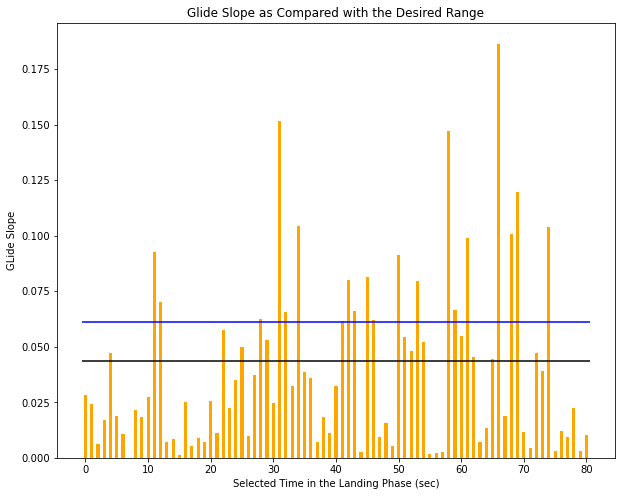

In [44]:
#courses = list(data.keys())
#values = list(data.values())
  
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(range(0,len((Ltan_VSpd)),1),Ltan_VSpd, color ='orange',width = 0.5)
 
plt.xlabel("Selected Time in the Landing Phase (sec)")
plt.ylabel("GLide Slope")
plt.title("Glide Slope as Compared with the Desired Range")
plt.hlines(Tan(2.5), -0.5, len((Ltan_VSpd))-0.5, 'black')
plt.hlines(Tan(3.5), -0.5, len((Ltan_VSpd))-0.5, 'blue')
plt.savefig('GLideSlope.jpg')
plt.show()

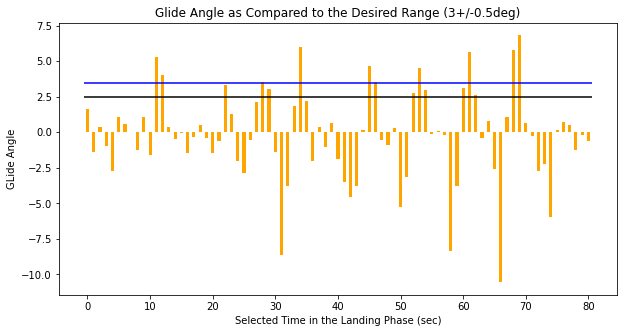

In [60]:
#courses = list(data.keys())
#values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(range(0,len((Latan_VSpd)),1),Latan_VSpd, color ='orange',width = 0.5)
 
plt.xlabel("Selected Time in the Landing Phase (sec)")
plt.ylabel("GLide Angle")
plt.title("Glide Angle as Compared to the Desired Range (3+/-0.5deg)")
plt.hlines((2.5), -0.5, len((Latan_VSpd))-0.5, 'black')
plt.hlines((3.5), -0.5, len((Latan_VSpd))-0.5, 'blue')
plt.savefig('GLideAngle.jpg')
plt.show()

In [61]:
#plt.hlines(0.04, 0, 15, 'black')


#print(len(Ltan_VSpd))



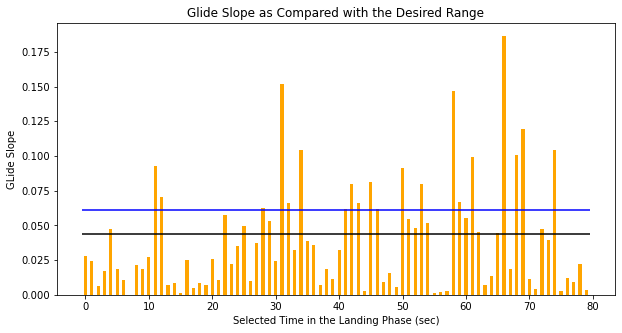

[0.028149234962874633, 0.024352823618672668, 0.006209093076172043, 0.016797371773412246, 0.04708231210641756, 0.01866927716698104, 0.010592940789921169, 9.20604089550125e-05, 0.021380618096543656, 0.018529511469271356, 0.027491160006228206, 0.0928425925281403, 0.07013564697517105, 0.0070984098009142845, 0.00854752593902072, 0.0014463641000127484, 0.024929721772696686, 0.005213092230829834, 0.008732848103436906, 0.007164877460821925, 0.02556270603461429, 0.010975079186302293, 0.0576908523487489, 0.02223494653207829, 0.03512666162593059, 0.04986044739316892, 0.009720597511034922, 0.03746499885206726, 0.06227216439353169, 0.053040564147778524, 0.02450639336581174, 0.15173774071692323, 0.06578998258958131, 0.032225856175112526, 0.10457009664927239, 0.03860332010501459, 0.0358628221463776, 0.006942158782124898, 0.018384330035935113, 0.011091221213714145, 0.03244150292346905, 0.06155376642499701, 0.07993182013014581, 0.06626773640311033, 0.002420724574700852, 0.0814878405183232, 0.0618553821

In [62]:
### Omitting the Outlier:
Omit_VSpd=[]

for i in range (0, (len(Ltan_VSpd)-1)):
    Omit_VSpd_q=Ltan_VSpd[i]
    Omit_VSpd.append(Omit_VSpd_q)
# fig = plt.figure(figsize = (10, 5))
 
 
# creating the bar plot

fig = plt.figure(figsize = (10, 5))
plt.bar(range(0,len((Omit_VSpd)),1),Omit_VSpd, color ='orange',width = 0.5)
 
plt.xlabel("Selected Time in the Landing Phase (sec)")
plt.ylabel("GLide Slope")
plt.title("Glide Slope as Compared with the Desired Range")
plt.hlines(Tan(2.5), -0.5, len((Omit_VSpd))-0.5, 'black')
plt.hlines(Tan(3.5), -0.5, len((Omit_VSpd))-0.5, 'blue')
plt.savefig('GLideSlope_ommited_1.jpg')
plt.show()    
print(Omit_VSpd)   

In [63]:
Lpitch=[]
LrealVSpd=[]
for i in range (0, len(Lintdd_VSpd)):
    Lpitch.append(df['  Pitch'][first+interval*(i)]) #*100 for bar plot
    LrealVSpd.append(df['    VSpd'][first+interval*(i)])
    #print(i,Lintdd_VSpd[i],df['    VSpd'][first+interval*(i)],df['  Pitch'][first+interval*(i)])
    #Ldiff_VSpd.append(Diff_VSpd)
    #if df['  Pitch'][first+interval*(i)]<-2.5:
        #print('Safety Issue!')
       # print(i,Lintdd_VSpd[i],df['    VSpd'][first+interval*(i)],df['  Pitch'][first+interval*(i)])
print(Lpitch)
#Lintdd_VSpd_1=Lintdd_VSpd*-1
print(Lintdd_VSpd)

[3.57, -0.32, 2.8, 3.69, 2.78, 1.02, 1.15, 0.75, 2.89, -0.49, 2.67, 8.12, 10.04, 5.37, 1.12, -0.12, -0.99, 2.98, 2.24, 2.58, 2.07, -0.15, 0.1, 1.75, -2.69, -1.48, 3.12, 1.92, 4.01, -2.21, -2.7, -5.78, 0.2, 5.98, 9.82, 7.58, 0.38, 4.38, 2.52, -0.78, -2.44, -3.07, -5.5, -4.21, 6.68, 5.95, 8.8, 4.22, 1.74, 4.19, -0.38, -0.42, 7.92, 6.1, 9.38, 3.15, 1.64, -0.13, -10.27, 1.38, 5.9, 9.07, 6.99, 3.88, 2.94, -1.46, -7.26, 1.7, 8.93, 8.87, 4.17, 2.33, 2.29, 0.34, -3.02, 0.14, 0.69, 0.71, 1.41, 2.52, 1.26]
[-538.635, -559.865, -522.575, -544.08, -578.0699999999999, -555.74, -520.65, -540.45, -527.6899999999999, -510.255, -558.27, -483.25, -496.395, -518.9449999999999, -570.92, -596.76, -586.7325, -552.165, -524.61, -520.54, -532.42, -564.375, -559.975, -534.5649999999999, -567.0699999999999, -564.375, -533.355, -543.2, -553.8149999999999, -498.21, -385.07500000000005, -349.49, -317.645, -393.105, -430.01, -482.81, -536.71, -532.64, -549.745, -544.3, -396.95500000000004, -334.75, -371.215, -366.1

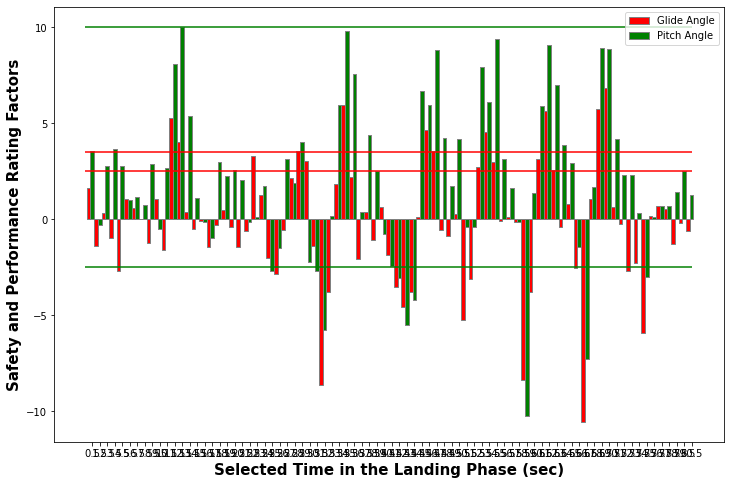

In [64]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.5
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]
# Latan_VSpd
# Set position of bar on X axis
br1 = np.arange((len((Latan_VSpd))))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1,Latan_VSpd, color ='r', width = barWidth,
        edgecolor ='grey', label ='Glide Angle')
plt.bar(br2,Lpitch, color ='g', width = barWidth, edgecolor ='grey', label ='Pitch Angle')
#plt.bar(br3, CSE, color ='b', width = barWidth,
#        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Selected Time in the Landing Phase (sec)', fontweight ='bold', fontsize = 15)
plt.ylabel('Safety and Performance Rating Factors', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Latan_VSpd))])


 
plt.legend()
plt.hlines(-2.5, -0.5, len((Latan_VSpd))-0.5, 'green')
plt.hlines(2.5, -0.5, len((Latan_VSpd))-0.5, 'red')
plt.hlines(3.5, -0.5, len((Latan_VSpd))-0.5, 'red')
plt.hlines(+10, -0.5, len((Latan_VSpd))-0.5, 'green')

plt.savefig('Safety_Performance_1.jpg')

In [65]:
print(len(Ltan_VSpd))

81


In [66]:
### Omitting the Outlier:
Omit_Pitch=[]

for i in range (0, (len(Ltan_VSpd)-1)):
    Omit_Pitch_q=Lpitch[i]
    Omit_Pitch.append(Omit_Pitch_q) 


print((Omit_Pitch))

[3.57, -0.32, 2.8, 3.69, 2.78, 1.02, 1.15, 0.75, 2.89, -0.49, 2.67, 8.12, 10.04, 5.37, 1.12, -0.12, -0.99, 2.98, 2.24, 2.58, 2.07, -0.15, 0.1, 1.75, -2.69, -1.48, 3.12, 1.92, 4.01, -2.21, -2.7, -5.78, 0.2, 5.98, 9.82, 7.58, 0.38, 4.38, 2.52, -0.78, -2.44, -3.07, -5.5, -4.21, 6.68, 5.95, 8.8, 4.22, 1.74, 4.19, -0.38, -0.42, 7.92, 6.1, 9.38, 3.15, 1.64, -0.13, -10.27, 1.38, 5.9, 9.07, 6.99, 3.88, 2.94, -1.46, -7.26, 1.7, 8.93, 8.87, 4.17, 2.33, 2.29, 0.34, -3.02, 0.14, 0.69, 0.71, 1.41, 2.52]


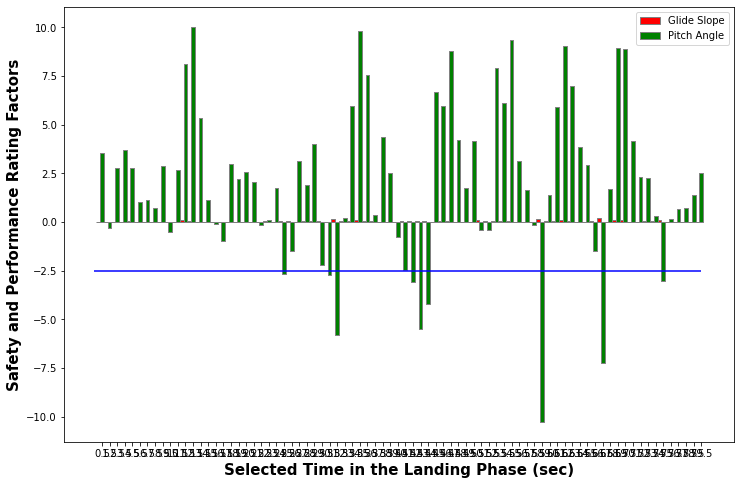

In [67]:
# set width of bar
barWidth = 0.5
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len((Omit_VSpd)))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1,Omit_VSpd, color ='r', width = barWidth,
        edgecolor ='grey', label ='Glide Slope')
plt.bar(br2,Omit_Pitch, color ='g', width = barWidth, edgecolor ='grey', label ='Pitch Angle')

# Adding Xticks
plt.xlabel('Selected Time in the Landing Phase (sec)', fontweight ='bold', fontsize = 15)
plt.ylabel('Safety and Performance Rating Factors', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Omit_VSpd))])


  
plt.legend()
plt.hlines(-2.5, -0.5, len((Omit_VSpd))-0.5, 'blue')

plt.savefig('Safety_Performance_ommited_1.jpg')

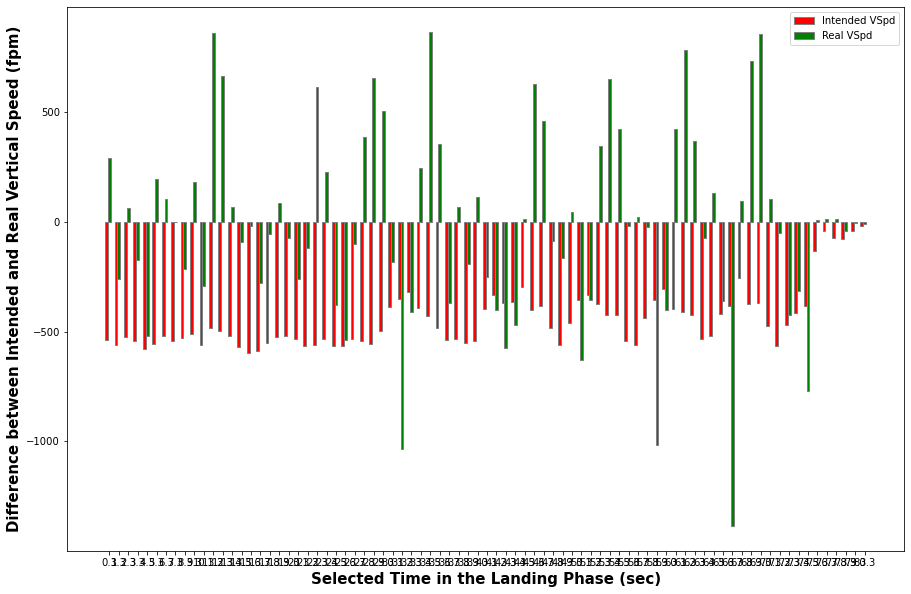

In [68]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(15, 10))

 
# Set position of bar on X axis
br1 = np.arange(len(Lintdd_VSpd))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]
#Lintdd_VSpd_1=Lintdd_VSpd*-1
#LrealVSpd_1=LrealVSpd*-1
# Make the plot
plt.bar(br1,Lintdd_VSpd, color ='r', width = barWidth,
        edgecolor ='grey', label ='Intended VSpd')
plt.bar(br2,LrealVSpd, color ='g', width = barWidth, edgecolor ='grey', label ='Real VSpd')
#plt.bar(br3, CSE, color ='b', width = barWidth,
#        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Selected Time in the Landing Phase (sec)', fontweight ='bold', fontsize = 15)
plt.ylabel('Difference between Intended and Real Vertical Speed (fpm)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Lintdd_VSpd))])
 
plt.legend()


plt.savefig('VSpds_1.jpg')